# Phase Portrait Applications

Teng-Jui Lin

Content adapted from UW AMATH 301, Beginning Scientific Computing, in Spring 2020.

- Phase portraits
    - "Two-eyed monster"

## Two-eyed monster

The system of ODEs

$$
\begin{aligned}
\dot{x} &= y + y^2 \\
\dot{y} &= 0.5x + 0.2y - xy + 1.2y^2
\end{aligned}
$$

is called the "two-eyed monster."

**Problem Statement.** Consider the "two-eyed monster" system of ODEs.

(a) Plot the phase portrait of the ODE system with the initial conditions of the equidistant grid of points in $(x, y) \in [-5, 3] \times [-3, 2]$ with $\Delta x = \Delta y = 0.5$ from times $t \in [0, 100]$.

(b) Plot the phase portrait of the ODE system with the initial conditions (x, y) of

`[0.01, 0], [-1, -3], [-3, -2], [-2, -3], [1, -3], [-3, 0], [-3, -1]`

with $\Delta x = \Delta y = 0.5$ for times $t \in [0, 100]$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import integrate

In [2]:
# quiver grid and initial conditions
xvec = np.linspace(-5, 3, 15)
yvec = np.linspace(-3, 2, 15)
X, Y = np.meshgrid(xvec, yvec)
initial_vals = np.meshgrid(xvec, yvec)
initial_vals = np.array([initial_vals[0].reshape(-1), initial_vals[1].reshape(-1)]).T

In [3]:
# time array
t_initial = 0
t_final = 100
dt = 0.1
t = np.arange(t_initial, t_final+dt/2, dt)

In [4]:
# ode system
dxdt = lambda x, y : y + y**2
dydt = lambda x, y : -0.5*x + 0.2*y - x*y + 1.2*y**2
ode_syst = lambda t, z : np.array([dxdt(*z), dydt(*z)])

In [5]:
# plot settings
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.rcParams.update({
    'font.family': 'Arial',  # Times New Roman, Calibri
    'font.weight': 'normal',
    'mathtext.fontset': 'cm',
    'font.size': 18,
    
    'lines.linewidth': 2,
    
    'axes.linewidth': 2,
    'axes.spines.top': False,
    'axes.spines.right': False,
    'axes.titleweight': 'bold',
    'axes.titlesize': 18,
    'axes.labelweight': 'bold',
    
    'xtick.major.size': 8,
    'xtick.major.width': 2,
    'ytick.major.size': 8,
    'ytick.major.width': 2,
    
    'figure.dpi': 80,
    
    'legend.framealpha': 1, 
    'legend.edgecolor': 'black',
    'legend.fancybox': False,
    'legend.fontsize': 14
})

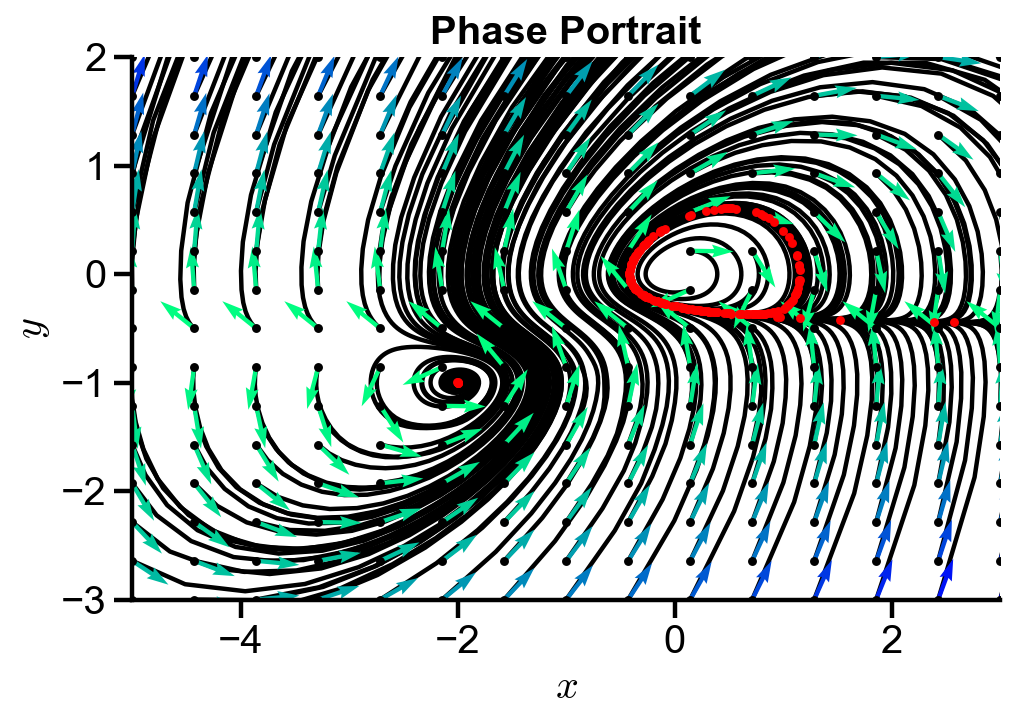

In [6]:
fig, ax = plt.subplots(figsize=(7, 7))
# slope field
scale = np.sqrt(dxdt(X, Y)**2 + dydt(X, Y)**2)
ax.quiver(X, Y, dxdt(X, Y)/scale, dydt(X, Y)/scale, scale, cmap='winter_r', scale=20, width=0.005)  # regular
# plot settings
ax.set_xlim(-5, 3)
ax.set_ylim(-3, 2)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_title('Phase Portrait')
ax.set_aspect('equal')

for i in range(len(initial_vals)):
    # ode soln
    ode_soln = scipy.integrate.solve_ivp(ode_syst, [t_initial, t_final], initial_vals[i], t_eval=t)
    # phase portrait
    ax.plot(ode_soln.y[0], ode_soln.y[1], color='black', zorder=0.5)
    ax.plot(ode_soln.y[0, -1], ode_soln.y[1, -1], '.', color='red', zorder=4)
    ax.plot(*initial_vals[i], '.', color='black')

▲ The figure above shows the trajectories of a grid of initial conditions for the two-eyed monster system. Most of the initial conditions spiral into the two eyes and form loops around the eyes. The final state denoted in red forms a loop about the eye or is at the eye center.

In [7]:
# initial conditions [x0, y0]
initial_vals = np.array([[0.01, 0], [-1, -3], [-3, -2], [-2, -3], [1, -3], [-3, 0], [-3, -1]])

In [8]:
# quiver grid
xvec = np.linspace(-3, 1.5, 20)
yvec = np.linspace(-2, 1, 20)
X, Y = np.meshgrid(xvec, yvec)

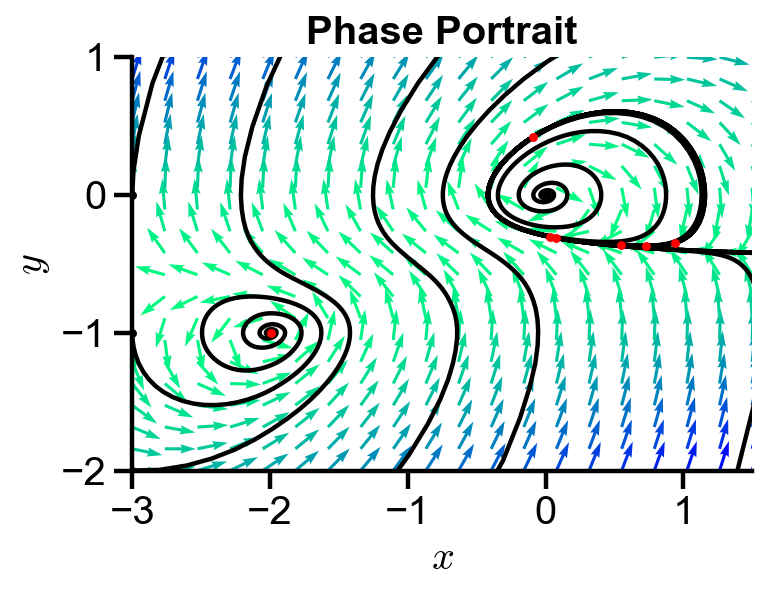

In [9]:
fig, ax = plt.subplots(figsize=(5, 5))
# slope field
scale = np.sqrt(dxdt(X, Y)**2 + dydt(X, Y)**2)
ax.quiver(X, Y, dxdt(X, Y)/scale, dydt(X, Y)/scale, scale, cmap='winter_r', scale=20, width=0.005)  # regular
# plot settings
ax.set_xlim(-3, 1.5)
ax.set_ylim(-2, 1)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_title('Phase Portrait')
ax.set_aspect('equal')

for i in range(len(initial_vals)):
    # ode soln
    ode_soln = scipy.integrate.solve_ivp(ode_syst, [t_initial, t_final], initial_vals[i], t_eval=t)
    # phase portrait
    ax.plot(ode_soln.y[0], ode_soln.y[1], color='black')
    ax.plot(ode_soln.y[0, -1], ode_soln.y[1, -1], '.', color='red', zorder=4)
    ax.plot(*initial_vals[i], '.', color='black')

▲ The figure above shows the trajectories of particular initial conditions for the two-eyed monster system. The trajectory spirals into the eyes or curve around the eyes.